In [2]:
# konlpy 설치
!pip install konlpy

# wordcloud 설치
!pip install wordcloud

!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 폰트 다운로드
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pac

In [4]:
import csv
import pandas as pd
import konlpy
import sys
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from IPython.display import Image
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
files.upload()

Saving 에이센트_평점별리뷰.csv to 에이센트_평점별리뷰 (2).csv
Saving 헤오드_평점별리뷰.csv to 헤오드_평점별리뷰 (2).csv
Saving 플로랑향기뿜뿜_평점별리뷰.csv to 플로랑향기뿜뿜_평점별리뷰 (2).csv
Saving 코코도르_평점별리뷰.csv to 코코도르_평점별리뷰 (2).csv
Saving 헤트라스_평점별리뷰.csv to 헤트라스_평점별리뷰 (2).csv


In [6]:
df1 = pd.read_csv('에이센트_평점별리뷰.csv')
df2 = pd.read_csv('헤오드_평점별리뷰.csv')
df3 = pd.read_csv('헤트라스_평점별리뷰.csv')
df4 = pd.read_csv('코코도르_평점별리뷰.csv')
df5 = pd.read_csv('플로랑향기뿜뿜_평점별리뷰.csv')

df1.head()

,Unnamed: 0,type,category,review,star,date,option,0,1,2,3
0,0,에이센트,별점,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5,20.12.24.,디퓨저 선택: 실속리필200mlX2★특가 / 디퓨저 향기: 7)그린에어리Greena...,디퓨저 선택: 실속리필200mlX2★특가,디퓨저 향기: 7)그린에어리Greenairy X2,NaN,NaN
1,1,에이센트,별점,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5,21.06.28.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 11)퍼플로즈(본품☆200ml),디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 11)퍼플로즈(본품☆200ml),NaN,NaN
2,2,에이센트,별점,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5,20.12.01.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 7)그린에어리Greenairy,디퓨저 선택: 실내본품200ml,디퓨저 향기: 7)그린에어리Greenairy,NaN,NaN
3,3,에이센트,별점,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5,21.01.07.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 14)오션브리즈Oceanbreeze,디퓨저 선택: 실내본품200ml,디퓨저 향기: 14)오션브리즈Oceanbreeze,NaN,NaN
4,4,에이센트,별점,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5,21.04.21.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 5)런더리&다우니Laundry&...,디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 5)런더리&다우니Laundry&Downy,NaN,NaN


In [7]:
# 데이터합치기
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Unnamed: 0,type,category,review,star,date,option,0,1,2,3,4,5,6,7,8
0,0,에이센트,별점,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5,20.12.24.,디퓨저 선택: 실속리필200mlX2★특가 / 디퓨저 향기: 7)그린에어리Greena...,디퓨저 선택: 실속리필200mlX2★특가,디퓨저 향기: 7)그린에어리Greenairy X2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,에이센트,별점,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5,21.06.28.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 11)퍼플로즈(본품☆200ml),디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 11)퍼플로즈(본품☆200ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,에이센트,별점,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5,20.12.01.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 7)그린에어리Greenairy,디퓨저 선택: 실내본품200ml,디퓨저 향기: 7)그린에어리Greenairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,에이센트,별점,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5,21.01.07.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 14)오션브리즈Oceanbreeze,디퓨저 선택: 실내본품200ml,디퓨저 향기: 14)오션브리즈Oceanbreeze,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,에이센트,별점,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5,21.04.21.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 5)런더리&다우니Laundry&...,디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 5)런더리&다우니Laundry&Downy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 필요한 데이터만 보기
df = df[['review','star']]
df

,review,star
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5
...,...,...
3351,냄새가 박카스냄새비슷하네요;; 다른향은 좋겟죠;;,평점1
3352,후기좋아서 풍자님믿고 구매했는데 제스탈은\n아니네요 향두개 골고루샀는데 둘다…싼 향...,평점1
3353,광고를 너무해서 구매해봤는데 역시나..또 당했…\n너무 하네…근처에서도 향이 느껴지...,평점1
3354,안방 하나 거실 하나 뒀고 한달도 안됐는데 저렇게 줄어있고 냄새 하나도 안 나용 풀...,평점1


In [9]:
# 평점별로 나누기

df5 = df[df['star'] == '평점5']
df4 = df[df['star'] == '평점4']
df3 = df[df['star'] == '평점3']
df2 = df[df['star'] == '평점2']
df1 = df[df['star'] == '평점1']

df5.head()

,review,star
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5


In [10]:
# review 데이터만 보기
df5 = df5[['review']]
df4 = df4[['review']]
df3 = df3[['review']]
df2 = df2[['review']]
df1 = df1[['review']]

df5.head()

,review
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단..."


# 5점



In [11]:
# 5점 Konlpy

# 데이터프레임을 해제하여 리스트로 변환
df_list = df5.values.tolist()

# 이중리스트를 단일리스트로 변환
df_list = np.array(df_list).flatten()

# 리스트를 해제 시키고 문자열 형태로 변환
df_str = "".join(df_list)

# 문자열을 txt 형태로 저장
f = open("abc5.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# Konlpy로 텍스트 추출
with open('abc5.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [12]:
# 5점 명사 빈도 카운트
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('구매', 3807)
('냄새', 3314)
('퓨저', 2799)
('에어리', 2467)
('향기', 2456)
('그린', 2136)
('화장실', 1964)
('느낌', 1834)
('발향', 1755)
('진짜', 1658)
('스틱', 1636)
('사용', 1605)
('정말', 1545)
('주문', 1455)
('기분', 1373)
('선물', 1321)
('생각', 1318)
('하나', 1257)
('거실', 1235)
('배송', 1181)
('제품', 1140)
('다른', 1075)
('섬유', 985)
('처음', 942)
('가격', 939)
('향수', 936)
('꽃집', 934)
('후기', 930)
('비누', 910)
('포장', 820)
('사은', 816)
('머리', 790)
('정도', 778)
('다음', 755)
('용량', 753)
('보고', 750)
('리뷰', 738)
('포레스트', 724)
('처솝', 722)
('추천', 711)
('센트', 709)
('마음', 702)
('에이', 701)
('플라워', 697)
('달달', 684)
('인테리어', 663)
('체리', 655)
('우디', 649)
('구입', 647)
('다우니', 639)
('고민', 627)
('디퓨져', 613)
('이번', 597)
('머스크', 569)
('레인', 503)
('선택', 497)
('조금', 489)
('제일', 488)
('방향', 487)
('일단', 475)
('아주', 474)
('계속', 471)
('이건', 466)
('드라이', 454)
('안방', 452)
('집안', 441)
('바로', 438)
('개인', 437)
('블랙', 433)
('그냥', 424)
('가성', 423)
('취향', 423)
('디자인', 422)
('여기', 414)
('화이트', 413)
('설명', 411)
('완전', 404)
('지금', 402)
('친구', 397)
('현관', 382)
('최고'

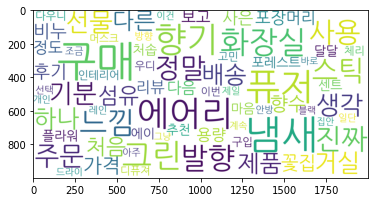

In [13]:
# 5점 리뷰 워드클라우드

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('워드클라우드_5점.png')

# 4점

In [14]:
# 4점 Konlpy

# 데이터프레임을 해제하여 리스트로 변환
df_list = df4.values.tolist()

# 이중리스트를 단일리스트로 변환
df_list = np.array(df_list).flatten()

# 리스트를 해제 시키고 문자열 형태로 변환
df_str = "".join(df_list)

# 문자열을 txt 형태로 저장
f = open("abc4.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# Konlpy로 텍스트 추출
with open('abc4.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [15]:
# 4점 명사 빈도 카운트
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('구매', 1005)
('냄새', 944)
('발향', 847)
('배송', 748)
('생각', 740)
('향기', 718)
('스틱', 710)
('사용', 613)
('에어리', 572)
('그린', 539)
('화장실', 535)
('하나', 486)
('느낌', 482)
('퓨저', 445)
('선물', 442)
('주문', 430)
('처음', 421)
('가격', 415)
('조금', 364)
('다른', 361)
('포장', 344)
('거실', 326)
('제품', 312)
('용량', 291)
('머리', 262)
('다음', 259)
('정도', 258)
('정말', 256)
('진짜', 256)
('사은', 255)
('구입', 253)
('섬유', 243)
('보고', 237)
('후기', 220)
('향수', 216)
('비누', 213)
('꽃집', 200)
('기분', 198)
('개인', 198)
('플라워', 198)
('취향', 192)
('포레스트', 190)
('인테리어', 188)
('체리', 180)
('그냥', 178)
('별로', 177)
('마음', 170)
('우디', 165)
('약간', 163)
('블랙', 160)
('다우니', 160)
('달달', 159)
('가성', 158)
('살짝', 156)
('리뷰', 153)
('처솝', 151)
('일단', 150)
('지속', 149)
('선택', 147)
('상품', 146)
('디자인', 143)
('레인', 141)
('시간', 136)
('디퓨져', 131)
('박스', 131)
('무난', 130)
('이번', 129)
('추천', 129)
('안나', 127)
('대비', 126)
('제일', 125)
('다만', 125)
('계속', 124)
('아주', 122)
('드라이', 117)
('머스크', 114)
('우드', 112)
('화이트', 112)
('욕실', 105)
('레몬', 104)
('다시', 104)
('지금', 101)
('

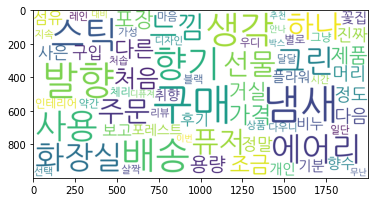

In [16]:
# 4점 리뷰 워드클라우드

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('워드클라우드_4점.png')

#3점

In [17]:
# 3점 Konlpy

# 데이터프레임을 해제하여 리스트로 변환
df_list = df3.values.tolist()

# 이중리스트를 단일리스트로 변환
df_list = np.array(df_list).flatten()

# 리스트를 해제 시키고 문자열 형태로 변환
df_str = "".join(df_list)

# 문자열을 txt 형태로 저장
f = open("abc3.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# Konlpy로 텍스트 추출
with open('abc3.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [18]:
# 3점 명사 빈도 카운트
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('냄새', 559)
('발향', 521)
('생각', 468)
('구매', 401)
('스틱', 348)
('배송', 315)
('향기', 301)
('사용', 261)
('처음', 237)
('안나', 213)
('퓨저', 189)
('별로', 185)
('화장실', 183)
('그냥', 179)
('머리', 175)
('에어리', 172)
('하나', 165)
('가격', 162)
('그린', 156)
('선물', 156)
('조금', 154)
('느낌', 153)
('정도', 150)
('포장', 149)
('주문', 144)
('다른', 138)
('보고', 126)
('지속', 104)
('거실', 101)
('제품', 100)
('체리', 97)
('취향', 95)
('리뷰', 92)
('사은', 91)
('정말', 87)
('상품', 86)
('포레스트', 82)
('용량', 80)
('시간', 79)
('거의', 75)
('다음', 74)
('가지', 74)
('비누', 73)
('후기', 73)
('블랙', 72)
('진짜', 71)
('구입', 70)
('방향', 68)
('가성', 68)
('선택', 67)
('무난', 66)
('일단', 65)
('개인', 64)
('향수', 62)
('약간', 61)
('섬유', 60)
('가까이', 59)
('살짝', 58)
('남자', 57)
('대비', 57)
('자체', 55)
('이번', 54)
('달달', 53)
('아주', 52)
('플라워', 52)
('기분', 51)
('기대', 51)
('지금', 50)
('디퓨져', 50)
('처솝', 49)
('화이트', 49)
('스킨', 49)
('디자인', 49)
('뚜껑', 46)
('우디', 46)
('다시', 46)
('금방', 46)
('꽃집', 45)
('박스', 45)
('현관', 44)
('라벤더', 44)
('인테리어', 44)
('계속', 44)
('마음', 43)
('공간', 41)
('릴리', 40)
('점점', 40)
(

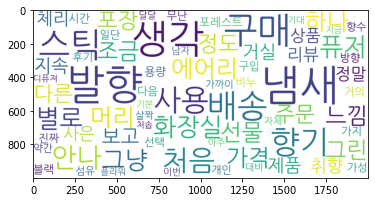

In [19]:
# 3점 리뷰 워드클라우드

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('워드클라우드_3점.png')

#2점

In [20]:
# 2점 Konlpy

# 데이터프레임을 해제하여 리스트로 변환
df_list = df2.values.tolist()

# 이중리스트를 단일리스트로 변환
df_list = np.array(df_list).flatten()

# 리스트를 해제 시키고 문자열 형태로 변환
df_str = "".join(df_list)

# 문자열을 txt 형태로 저장
f = open("abc2.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# Konlpy로 텍스트 추출
with open('abc2.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [21]:
# 2점 명사 빈도 카운트
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('냄새', 163)
('발향', 151)
('안나', 121)
('스틱', 114)
('구매', 97)
('생각', 86)
('별로', 81)
('머리', 74)
('향기', 74)
('처음', 63)
('퓨저', 56)
('그냥', 52)
('사용', 50)
('정도', 47)
('제품', 47)
('배송', 47)
('하나', 46)
('화장실', 44)
('보고', 43)
('거실', 42)
('후기', 41)
('포장', 40)
('거의', 37)
('에어리', 34)
('취향', 34)
('그린', 33)
('느낌', 32)
('실망', 31)
('선물', 30)
('진짜', 28)
('주문', 28)
('가까이', 28)
('개인', 26)
('가격', 26)
('다른', 26)
('이번', 24)
('리뷰', 24)
('비누', 23)
('전혀', 23)
('조금', 22)
('체리', 22)
('정말', 21)
('포레스트', 20)
('계속', 20)
('시간', 20)
('이건', 19)
('구입', 19)
('우디', 19)
('뚜껑', 19)
('다시', 19)
('일주일', 19)
('기대', 17)
('하루', 17)
('박스', 17)
('지속', 16)
('약간', 15)
('선택', 15)
('다우니', 14)
('제일', 14)
('스킨', 14)
('방향', 14)
('잘못', 14)
('상품', 14)
('광고', 14)
('설명', 13)
('남자', 13)
('알콜', 13)
('디자인', 13)
('달달', 13)
('다음', 13)
('블랙', 13)
('용량', 13)
('화이트', 12)
('우드', 11)
('향수', 11)
('가야', 11)
('아예', 11)
('인위', 11)
('코튼', 11)
('예전', 11)
('가지', 10)
('섬유', 10)
('처솝', 10)
('바로', 10)
('달라', 10)
('며칠', 10)
('완전', 10)
('추가', 10)
('역시', 10)
('그닥', 1

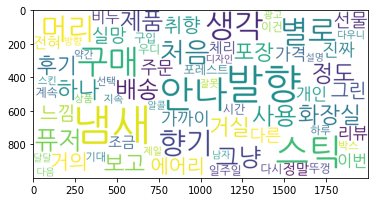

In [22]:
# 2점 리뷰 워드클라우드

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('워드클라우드_2점.png')

#1점

In [23]:
# 1점 Konlpy

# 데이터프레임을 해제하여 리스트로 변환
df_list = df1.values.tolist()

# 이중리스트를 단일리스트로 변환
df_list = np.array(df_list).flatten()

# 리스트를 해제 시키고 문자열 형태로 변환
df_str = "".join(df_list)

# 문자열을 txt 형태로 저장
f = open("abc1.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# Konlpy로 텍스트 추출
with open('abc1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [24]:
# 1점 명사 빈도 카운트
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('냄새', 278)
('발향', 142)
('구매', 132)
('안나', 132)
('스틱', 114)
('퓨저', 112)
('머리', 98)
('별로', 93)
('하나', 89)
('제품', 85)
('배송', 81)
('향기', 71)
('진짜', 70)
('그냥', 66)
('리뷰', 65)
('생각', 64)
('전혀', 61)
('처음', 60)
('주문', 55)
('사용', 52)
('다른', 52)
('실망', 48)
('후기', 46)
('거의', 39)
('화장실', 37)
('광고', 36)
('정도', 34)
('보고', 33)
('안남', 33)
('상품', 30)
('바로', 30)
('뚜껑', 28)
('에어리', 28)
('선물', 28)
('구입', 27)
('다시', 27)
('택배', 27)
('거실', 27)
('가까이', 26)
('포장', 26)
('체리', 26)
('박스', 26)
('추천', 24)
('최악', 23)
('그린', 23)
('일주일', 23)
('아예', 23)
('느낌', 22)
('가격', 21)
('문제', 21)
('개인', 21)
('완전', 21)
('싸구려', 21)
('용량', 21)
('디퓨져', 20)
('정말', 20)
('알콜', 20)
('이건', 20)
('때문', 19)
('이틀', 19)
('절대', 19)
('기분', 18)
('방향', 18)
('반품', 18)
('상자', 18)
('대야', 18)
('지금', 17)
('원래', 17)
('물건', 17)
('블랙', 17)
('시간', 17)
('문의', 16)
('사진', 16)
('취향', 16)
('가지', 16)
('예전', 16)
('조금', 16)
('무슨', 16)
('자체', 15)
('하루', 15)
('일단', 15)
('이상', 15)
('리필', 15)
('발송', 15)
('성분', 14)
('누가', 14)
('멀미', 14)
('뭔가', 14)
('당황', 14)
('개도', 14

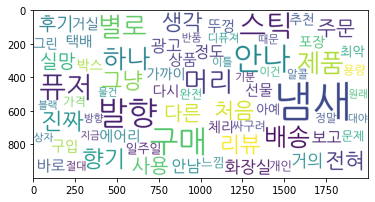

In [25]:
# 1점 리뷰 워드클라우드

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('워드클라우드_1점.png')